In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [ ]:
#test
#ALl done in gpt4omini
#evidence_k, max_resurces, with_rcs, with_agent, precision,accuracy
#30, 15,Yes,Yes,0.7954545454545454，0.7142857142857143
#30,5,Yes, Yes, 0.6739130434782609， 0.6326530612244898,
#1,15,Yes, Yes,0.5806451612903226,0.3673469387755102
#5,15,Yes,Yes,0.75,0.6122448979591837
#10,15,Yes,Yes,0.7027027027027027,0.5306122448979592

#30,15,No,Yes,0.6764705882352942,0.46938775510204084
#30,15,Yes,No,0.7837837837837838，0.5918367346938775


#gpt-4o-mini
#precision,accuracy
#0.205,0.184


##search agent->gpt-4o
#30, 15,Yes,Yes,0.8043478260869565,0.7551020408163265

##search agent->gpt-4.1
#30, 15,Yes,Yes,0.782608695652174,0.7346938775510204


## summary agent-> gpt 4o
#30,15,Yes,Yes,0.7674418604651163,0.673469387755102

## summary agent-> gpt 4.1
#30,15,Yes,Yes,0.7727272727272727,0.6938775510204082



#answer agent-> gpt 4o
#30,15,Yes,Yes,0.7209302325581395,0.6326530612244898

#answer agent-> gpt 4.1
#30,15,Yes,Yes,0.7948717948717948,0.6326530612244898


## all in gpt4o
#0.8297872340425532,0.7959183673469388


########
#train
#evidence_k, max_resurces, with_rcs, with_agent, precision,accuracy
#30, 15,Yes,Yes,0.8260869565217391,0.6683417085427136
#30,5,Yes, Yes, 0.7964071856287425，0.6683417085427136
#1,15,Yes, Yes,0.7567567567567568,0.4221105527638191
#5,15,Yes,Yes,0.8732394366197183,0.6231155778894473
#10,15,Yes,Yes,0.831081081081081,0.6180904522613065

#30,15,No,Yes,0.6486486486486487,0.36180904522613067
#30,15,Yes,No,0.39226519337016574,0.35678391959798994

##gpt4omini
#precision,accuracy
#0.37037037037037035,0.3015075376884422


In [ ]:
## embedding

#all others are kep the same

##small
#evidence_k, max_resurces, with_rcs, with_agent, precision,accuracy
#30, 15,Yes,Yes,0.7954545454545454，0.7142857142857143


#large
#30,5,Yes, Yes, 0.6976744186046512, 0.6122448979591837



In [7]:
# Create DataFrame from your data
data = pd.DataFrame([
    {"model": "Cutoff @ 15", "precision": 0.7954, "accuracy": 0.7143},
    {"model": "Cutoff @ 5", "precision": 0.6739, "accuracy": 0.6327},
    {"model": "Top K @ 1", "precision": 0.5806, "accuracy": 0.3673},
    {"model": "Top K @ 5", "precision": 0.7500, "accuracy": 0.6122},
    {"model": "Top K @ 10", "precision": 0.7027, "accuracy": 0.5306},
    {"model": "No RCS", "precision": 0.6765, "accuracy": 0.4694},
    {"model": "No Agent", "precision": 0.7838, "accuracy": 0.5918},
    {"model": "GPT-4o-mini", "precision": 0.2050, "accuracy": 0.1840},
    # Add human performance if available
    #{"model": "RandomGuessing", "precision": 0, "accuracy":0.1845 }  # Example values from your chart
])

# Sort by precision (descending)
# data = data.sort_values('precision', ascending=False)

In [4]:
# Create DataFrame from the train dataset with values rounded to 2 decimal places
train_data = pd.DataFrame([
    {"model": "Cutoff @ 15", "precision": 0.83, "accuracy": 0.67},
    {"model": "Cutoff @ 5", "precision": 0.80, "accuracy": 0.67},
    {"model": "Top K @ 1", "precision": 0.76, "accuracy": 0.42},
    {"model": "Top K @ 5", "precision": 0.87, "accuracy": 0.62},
    {"model": "Top K @ 10", "precision": 0.83, "accuracy": 0.62},
    {"model": "No RCS", "precision": 0.65, "accuracy": 0.36},
    {"model": "No Agent", "precision": 0.39, "accuracy": 0.36},
    {"model": "GPT-4o-mini", "precision": 0.37, "accuracy": 0.30},
    # You can add human performance if available
    # {"model": "Human", "precision": 0.00, "accuracy": 0.00}
])

/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_74250/1637348501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='precision', data=data, ax=ax1, palette='RdYlBu_r')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_74250/1637348501.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_74250/1637348501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=data, ax=ax2, palette='RdYlBu_r')
/var/folders/wg/h6z2ybxs0bnfsz9z

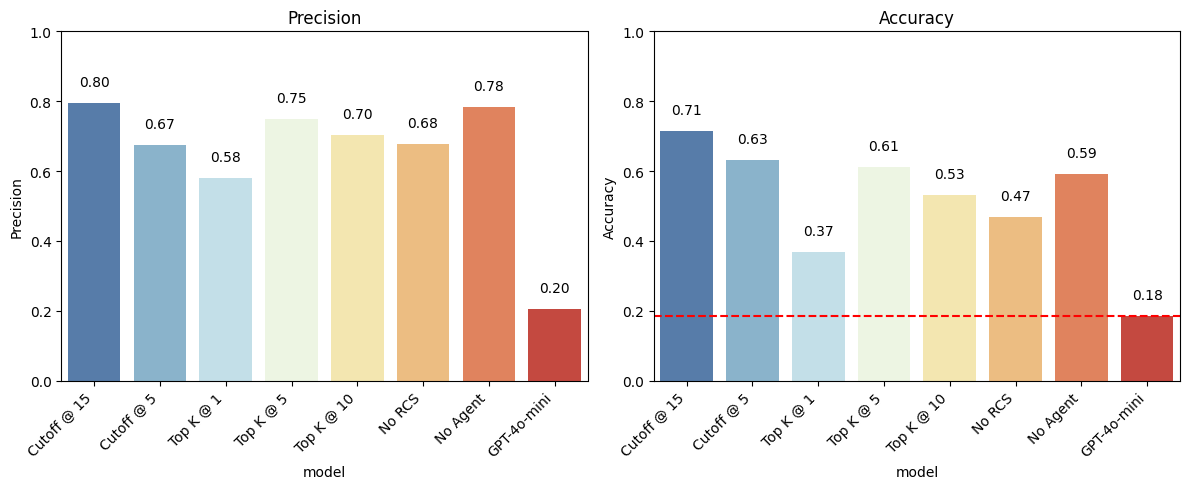

In [8]:
# Create a figure with two subplots (precision and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot precision
sns.barplot(x='model', y='precision', data=data, ax=ax1, palette='RdYlBu_r')
ax1.set_ylabel('Precision')
ax1.set_title('Precision')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylim(0, 1)

# Plot accuracy
sns.barplot(x='model', y='accuracy', data=data, ax=ax2, palette='RdYlBu_r')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.axhline(y=0.1845, color='r', linestyle='--', label='Random Guessing')
ax2.set_ylim(0, 1)
#add annotations
for i, row in data.iterrows():
    ax1.text(i, row['precision'] + 0.04, f"{row['precision']:.2f}", ha='center', va='bottom')
    ax2.text(i, row['accuracy'] + 0.04, f"{row['accuracy']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('paperqa2_performance_on_test.png', dpi=300)
plt.show()

/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_83794/4126883098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='precision', data=train_data, ax=ax1, palette='RdYlBu_r')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_83794/4126883098.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_83794/4126883098.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=train_data, ax=ax2, palette='RdYlBu_r')
/var/folders/wg/h6z2

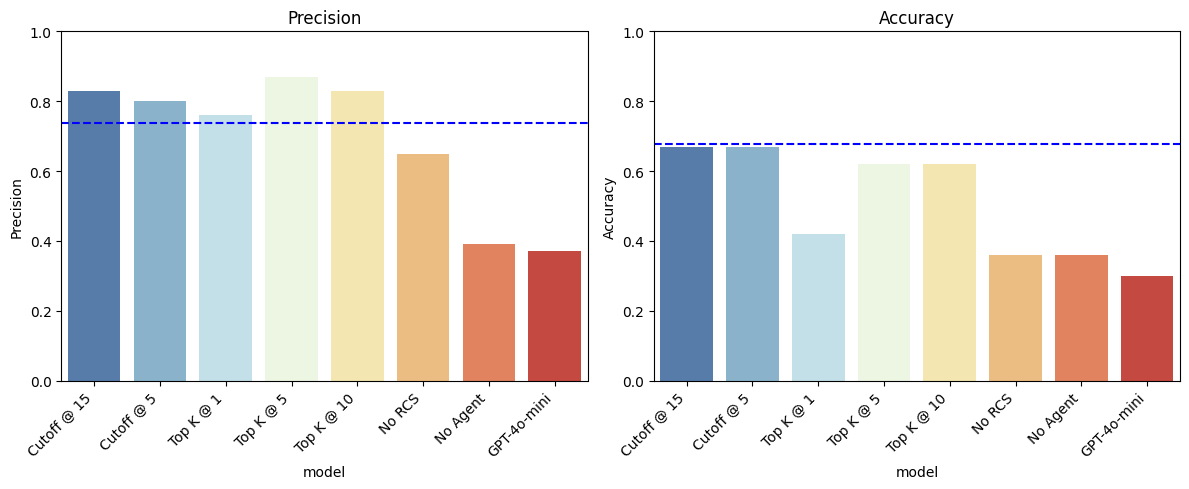

In [7]:
# Create a figure with two subplots (precision and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot precision
sns.barplot(x='model', y='precision', data=train_data, ax=ax1, palette='RdYlBu_r')
ax1.set_ylabel('Precision')
ax1.set_title('Precision')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.axhline(y=data[data['model'] == 'Human']['precision'].values[0], 
           color='blue', linestyle='--', label=f"Human = {data[data['model'] == 'Human']['precision'].values[0]}")
ax1.set_ylim(0, 1)

# Plot accuracy
sns.barplot(x='model', y='accuracy', data=train_data, ax=ax2, palette='RdYlBu_r')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.axhline(y=data[data['model'] == 'Human']['accuracy'].values[0], 
           color='blue', linestyle='--', label=f"Human = {data[data['model'] == 'Human']['accuracy'].values[0]}")
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('paperqa2_performance.png', dpi=300)
plt.show()